In [40]:
import torch
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# PyTorch 출력 형식 조정
torch.set_printoptions(precision=8, threshold=10000, edgeitems=3)

In [22]:
file_path = "C:/Users/jhh88/Downloads/wiset_train_data_20240329-20240513.xlsx"
file_path1 = "C:/Users/jhh88/Downloads/wiset_test_data_20240407.xlsx"

df = pd.read_excel(file_path)
df1 = pd.read_excel(file_path1)

# 데이터프레임의 모든 object 타입 열을 숫자로 변환
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# 데이터프레임의 모든 object 타입 열을 숫자로 변환
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

In [23]:
# 결측값을 0으로 대체 (또는 다른 방법으로 처리)
df.fillna(0, inplace=True)
df1.fillna(0, inplace=True)

# 변환된 결과 타입 확인
print("After conversion:")
print(df.dtypes)

# 변환된 데이터 확인
print("Converted DataFrame:")
print(df.head())

# 'datetime' 열을 제외한 나머지 열을 numpy 배열로 변환
train = df.drop(columns=['datetime']).to_numpy()
test = df1.drop(columns=['datetime']).to_numpy()

#print(test)

After conversion:
datetime        datetime64[ns]
azimuth                float64
elevation              float64
new_illum_10           float64
new_illum_11           float64
new_illum_12           float64
new_illum_4            float64
new_illum_5            float64
new_illum_6            float64
new_illum_7            float64
new_illum_8            float64
new_illum_9            float64
dtype: object
Converted DataFrame:
             datetime  azimuth  elevation  new_illum_10  new_illum_11  \
0 2024-03-29 09:52:00   121.58      39.75    378.863745    614.031914   
1 2024-03-29 09:53:00   121.82      39.92    387.654520    634.757015   
2 2024-03-29 09:54:00   122.05      40.09    383.086819    630.556511   
3 2024-03-29 09:55:00   122.29      40.26    388.134255    636.466910   
4 2024-03-29 09:56:00   122.53      40.43    407.295975    658.898978   

   new_illum_12  new_illum_4  new_illum_5  new_illum_6  new_illum_7  \
0    606.554735   343.884207   458.049286   434.688888   236.2753

In [24]:
# PyTorch 출력 형식 조정
torch.set_printoptions(precision=8, threshold=10000, edgeitems=3)

# 데이터 정규화 (Min-Max Scaling)
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

# 첫 5개 열을 입력 데이터로 사용
x_train = torch.FloatTensor(train[:, :5])
x_test = torch.FloatTensor(test[:, :5])

# 나머지 열을 출력 데이터로 사용
y_train = torch.FloatTensor(train[:, 5:])
y_test = torch.FloatTensor(test[:, 5:])

#print(x_train)
#print(x_test)
#print(y_train)
#print(y_test)

tensor([[0.41138256, 0.64424366, 0.32676947, 0.44020256, 0.54207224],
        [0.41219464, 0.64614010, 0.33435929, 0.45506048, 0.55077785],
        [0.41297287, 0.64803660, 0.33041561, 0.45204914, 0.56309211],
        ...,
        [0.98934156, 0.21898706, 0.01738229, 0.02012997, 0.01851811],
        [0.98984909, 0.21720214, 0.01624353, 0.01884941, 0.01719164],
        [0.99035662, 0.21530567, 0.01509793, 0.01747929, 0.01600057]])
tensor([[0.27901468, 0.22043730, 0.01609588, 0.01869475, 0.01678391],
        [0.27952224, 0.22255689, 0.01735442, 0.02024185, 0.01829852],
        [0.28002977, 0.22456492, 0.01854153, 0.02167357, 0.01970282],
        [0.28053731, 0.22668451, 0.01972396, 0.02308933, 0.02112760],
        [0.28104487, 0.22869255, 0.02103015, 0.02457261, 0.02257027],
        [0.28155240, 0.23081213, 0.02235214, 0.02598280, 0.02416956],
        [0.28202611, 0.23293173, 0.02387858, 0.02752127, 0.02576272],
        [0.28253368, 0.23505132, 0.02542076, 0.02916367, 0.02734773],
      

In [25]:
# 모델 정의 (복잡도 증가 및 드롭아웃 추가)
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(5, 20)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(20, 10)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(10, 6)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x


In [26]:
#model = nn.Linear(5,6)
model = SimpleNN()
#print(model)

#print(list(model.parameters()))

SimpleNN(
  (fc1): Linear(in_features=5, out_features=20, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=20, out_features=10, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=10, out_features=6, bias=True)
)
[Parameter containing:
tensor([[-0.01819128,  0.34691995, -0.27540052, -0.21858613,  0.05601948],
        [-0.14702910,  0.43749869,  0.34670037,  0.03250998,  0.03948879],
        [ 0.14546478,  0.34719789, -0.11684588, -0.09461561, -0.18930793],
        [-0.12376314,  0.41758633,  0.01409858,  0.29468387,  0.06874973],
        [ 0.32619268, -0.12178901, -0.22323371, -0.35969329, -0.14124516],
        [-0.29597270, -0.11309391,  0.29587013, -0.33589810, -0.07253724],
        [-0.00349194, -0.00366548, -0.12215924, -0.05808014,  0.18106943],
        [ 0.30774063,  0.41501343, -0.35767734, -0.19161105,  0.36927414],
        [ 0.35209972,  0.12771690,  0.23055834, -0.19908647, -0.20390102],
        [ 0.28361535,  0

In [27]:
# 학습률(lr): 한 번 움직이는 거리
# Adam 옵티마이저 사용 (SGD 대신)
optimizer = optim.Adam(model.parameters(), lr=1e-2, weight_decay=1e-5)  # L2 정규화 추가

# 조기 종료 설정
early_stopping_patience = 10
best_test_loss = float('inf')
epochs_no_improve = 0

#학습
epochs = 1000
train_score = []
test_score = []

for epoch in range(epochs + 1):
    model.train()
    # 순방향 전파
    y_pred = model(x_train)
    loss = nn.MSELoss()(y_pred, y_train)
    optimizer.zero_grad() #gradient를 초기화
    loss.backward() # 역전파: 미분값을 정하고 방향을 찾은 다음 주어진 lr만큼 이동하며 얻은 기울기와 절편을 계산
    optimizer.step()
    
    train_score.append(loss.item())
    
    if epoch % 100 == 0:
        model.eval()
        with torch.no_grad():
            y_test_pred = model(x_test)
            test_loss = nn.MSELoss()(y_test_pred, y_test)
            test_score.append(test_loss.item())
            print(f'Epoch {epoch}/{epochs} Train Loss: {loss.item():.6f} Test Loss: {test_loss.item():.6f}')
            
            # 조기 종료 확인
            if test_loss < best_test_loss:
                best_test_loss = test_loss
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1
                if epochs_no_improve >= early_stopping_patience:
                    print("Early stopping triggered")
                    break
                    
        model.train()

Epoch 0/1000 Train Loss: 0.180443 Test Loss: 0.249725
Epoch 100/1000 Train Loss: 0.015079 Test Loss: 0.011103
Epoch 200/1000 Train Loss: 0.012712 Test Loss: 0.007751
Epoch 300/1000 Train Loss: 0.011393 Test Loss: 0.009156
Epoch 400/1000 Train Loss: 0.011337 Test Loss: 0.009959
Epoch 500/1000 Train Loss: 0.011037 Test Loss: 0.011002
Epoch 600/1000 Train Loss: 0.011109 Test Loss: 0.009419
Epoch 700/1000 Train Loss: 0.011208 Test Loss: 0.009673
Epoch 800/1000 Train Loss: 0.011088 Test Loss: 0.010315
Epoch 900/1000 Train Loss: 0.011137 Test Loss: 0.009410
Epoch 1000/1000 Train Loss: 0.011075 Test Loss: 0.009778


In [28]:
# 학습된 모델 파라미터 출력
#print("Learned parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        #print(name, param.data)


Learned parameters:
fc1.weight tensor([[ 4.92586195e-03,  2.04019770e-02, -3.49899411e-01, -4.08496380e-01,
         -2.77540714e-01],
        [-2.67186458e-03,  1.72401872e-02,  3.51719260e-01,  1.78007960e-01,
          2.88363308e-01],
        [ 1.22135840e-02,  1.81665823e-01, -1.32028982e-01, -1.23356499e-01,
         -1.75550535e-01],
        [ 3.65037564e-03,  1.39465602e-02,  2.56524295e-01,  3.92026842e-01,
          2.12775350e-01],
        [ 9.06263071e-04, -6.10765330e-02, -6.31553650e-01, -6.27725005e-01,
         -3.53731990e-01],
        [-1.95166469e-02, -4.12680991e-02, -3.20769668e-01, -7.05343723e-01,
         -3.44874859e-01],
        [-3.69195314e-03,  6.65464345e-03,  2.70838320e-01,  2.15110451e-01,
          2.30281562e-01],
        [ 6.24473840e-02,  7.53599107e-02, -5.37445247e-01, -5.05500555e-01,
         -1.05009176e-01],
        [-2.26313546e-02,  3.88166942e-02, -1.71347782e-01, -4.43540186e-01,
         -3.30515206e-01],
        [-1.25003150e-02, -5.0105

In [29]:
# 테스트 데이터로 모델 평가
model.eval()
with torch.no_grad():
    y_test_pred = model(x_test)
    test_loss = nn.MSELoss()(y_test_pred, y_test)
    #test_score.append(test_loss.item())
    print(f'Test Loss: {test_loss.item():.6f}')
    


Test Loss: 0.009778


In [41]:
# 모델 평가 지표
# MeanSquared Error : 값이 낮을수록 예측값 = 실제 값
mse = mean_squared_error(y_test.numpy(), y_test_pred.numpy())

# R^2 Sccre : 1에 가까울수록 모델이 데이터를 잘 설명함
r2 = r2_score(y_test.numpy(), y_test_pred.numpy())

# Mean Absolute Error : 평균 절대 오차. 
# 값이 낮으면 모델이 대부분의 경우에 정확한 예측을 한다는 뜻
mae = mean_absolute_error(y_test.numpy(), y_test_pred.numpy())

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.00977818388491869
R^2 Score: 0.8495426890565433
Mean Absolute Error: 0.07652027904987335


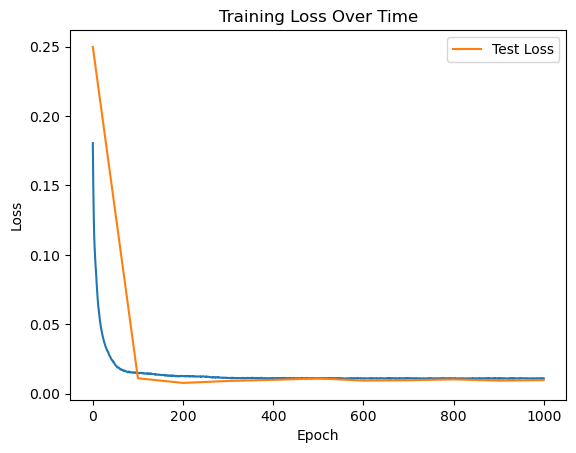

In [30]:
# 손실 값 시각화
plt.plot(train_score)
plt.plot(np.arange(0, len(test_score) * 100, 100), test_score, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()